# **Mounting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Data**

In [22]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Game Sales Analytics/vgsales_clean.csv")
df = pd.DataFrame(df)

In [23]:
df['Year'] = df['Year'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16598 non-null  int64  
 1   Rank          16598 non-null  int64  
 2   Name          16598 non-null  object 
 3   Platform      16598 non-null  object 
 4   Year          16598 non-null  object 
 5   Genre         16598 non-null  object 
 6   Publisher     16598 non-null  object 
 7   NA_Sales      16598 non-null  float64
 8   EU_Sales      16598 non-null  float64
 9   JP_Sales      16598 non-null  float64
 10  Other_Sales   16598 non-null  float64
 11  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [25]:
df.drop(df.columns[0], axis=1, inplace=True)

In [26]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# **Data Visualization**

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

### *Top 10 Publishers by Game Count*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive')])

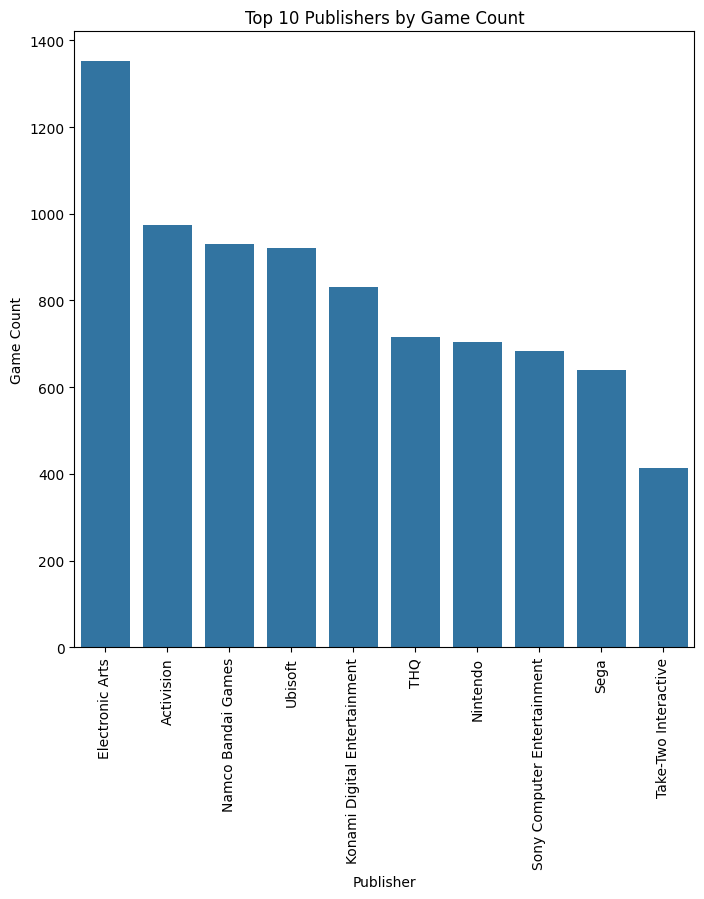

In [28]:
top_publishers = df['Publisher'].value_counts().nlargest(10)
df_top_publishers = pd.DataFrame(top_publishers)

plt.figure(figsize=(8, 8))
plt.tight_layout()
sns.barplot(x = 'Publisher', y = 'count', data = df_top_publishers)
plt.title('Top 10 Publishers by Game Count')
plt.ylabel("Game Count")
plt.xticks(rotation=90)

### *Top 10 Publishers by Global Sales*

Text(0.5, 1.0, 'Top 10 Publishers by Global Sales')

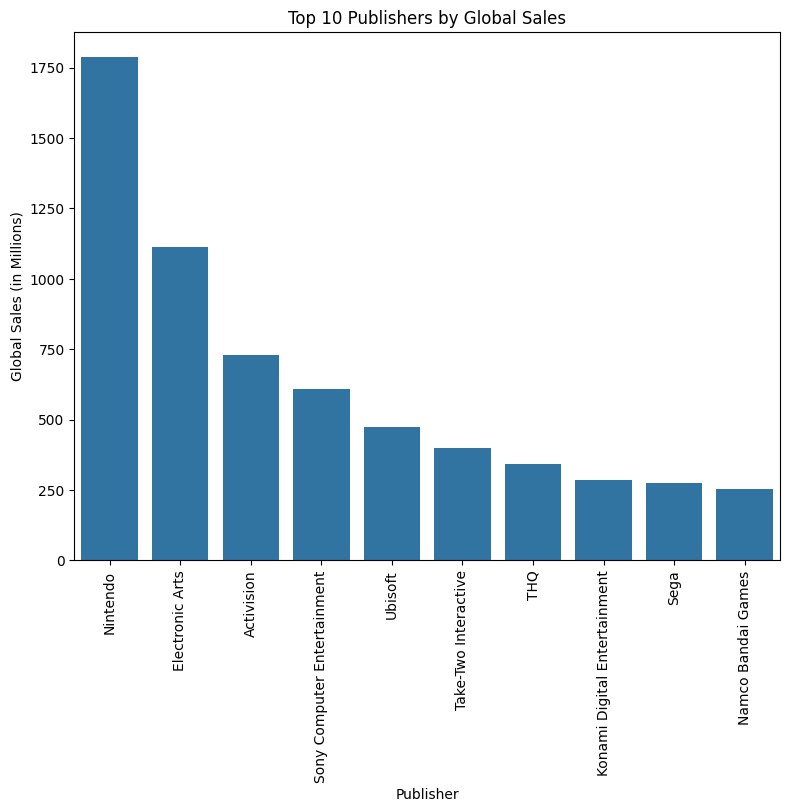

In [29]:
df_pub = df.groupby('Publisher')
pub_dict = {name:group['Global_Sales'].sum() for name, group in df_pub}

max_global_sales = sorted(list(pub_dict.values()), reverse=True)[:10]

max_global = {name: sales for name, sales in pub_dict.items() if sales in max_global_sales}
max_global = dict(sorted(max_global.items(), key=lambda item: item[1], reverse=True)[:10])

df_max_global = pd.DataFrame(list(max_global.items()), columns=['Publisher', 'Global_Sales'])

plt.figure(figsize=(8, 8))
sns.barplot(x = 'Publisher', y = "Global_Sales", data = df_max_global)
plt.xticks(rotation = 90)
plt.ylabel("Global Sales (in Millions)")
plt.tight_layout()
plt.title('Top 10 Publishers by Global Sales')


### *Top 20 Games Over The Years (1975 - 2020)*

In [30]:
df['Year'].unique().max()

'2020'

Text(0, 0.5, 'Global Sales (Millions)')

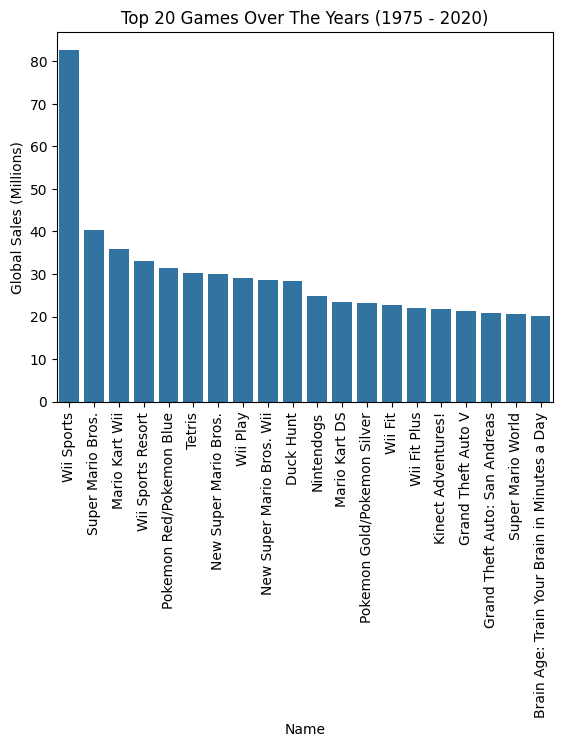

In [31]:
top_games = df.nlargest(20, 'Global_Sales')
sns.barplot(x = 'Name', y = 'Global_Sales', data = top_games)

plt.title("Top 20 Games Over The Years (1975 - 2020)")
plt.xticks(rotation=90)
plt.ylabel("Global Sales (Millions)")

### *Popular Consoles*

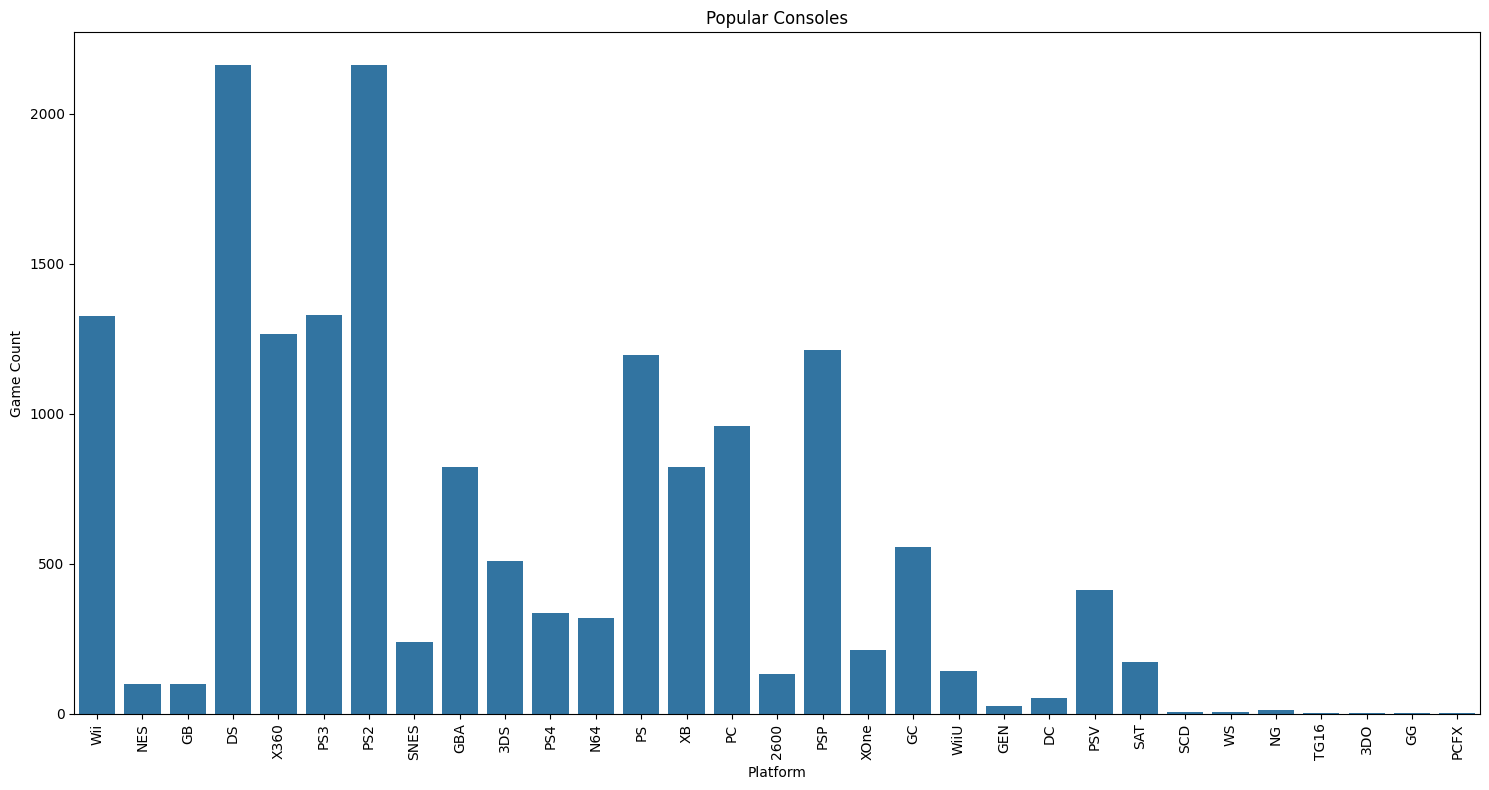

In [32]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Platform', data = df)
plt.title("Popular Consoles")
plt.ylabel("Game Count")
plt.xticks(rotation=90)
plt.tight_layout()

### *Sales by Genre for Different Regions*

In [43]:
regions = ['EU_Sales', 'NA_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
max_sales = df_genre[regions].max()
max_sales

EU_Sales         525.00
NA_Sales         877.83
JP_Sales         352.31
Other_Sales      187.38
Global_Sales    1751.18
dtype: float64

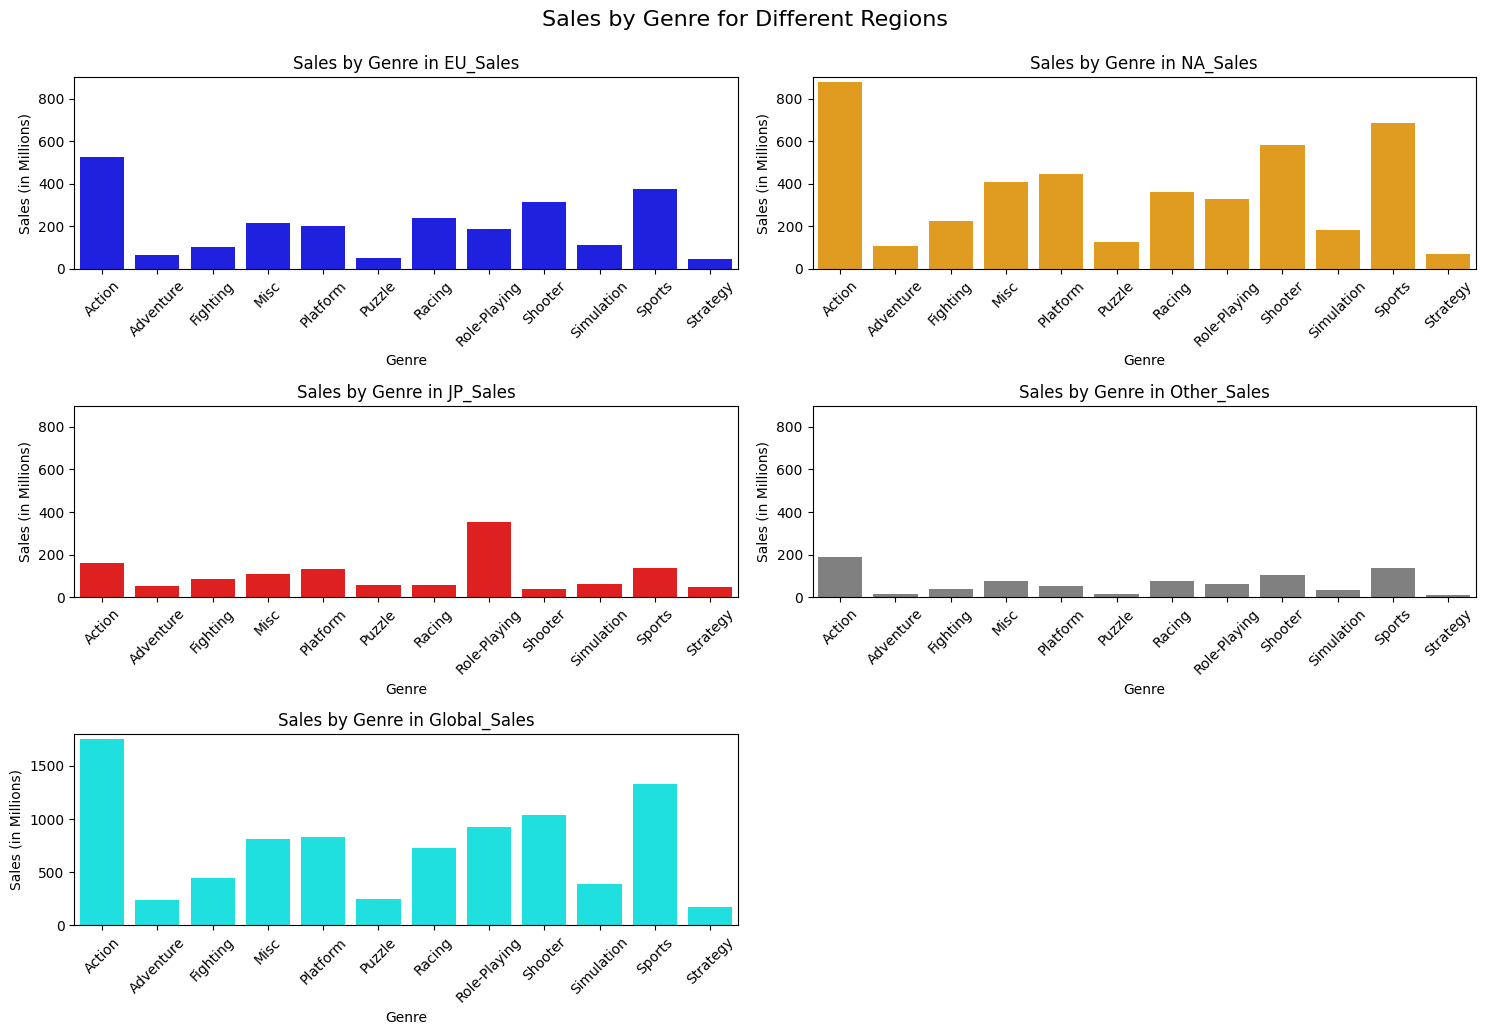

In [46]:
df_genre = df.groupby("Genre").sum().reset_index()

colors = ["Blue", 'Orange', 'Red', "Grey", 'Cyan']

max_sales = df_genre[regions].max()

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, region in enumerate(regions):
    sns.barplot(x='Genre', y=region, data=df_genre, ax=axes[i], color=colors[i])
    axes[i].set_title('Sales by Genre in {}'.format(region))
    axes[i].set_xlabel('Genre')
    axes[i].set_ylabel('Sales (in Millions)')
    axes[i].set_ylim(0, 900)
    axes[i].tick_params(axis='x', rotation=45)

fig.delaxes(axes[5])
axes[4].set_ylim(0, 1800)

plt.tight_layout()
plt.suptitle('Sales by Genre for Different Regions', fontsize=16, y=1.03)
plt.show()

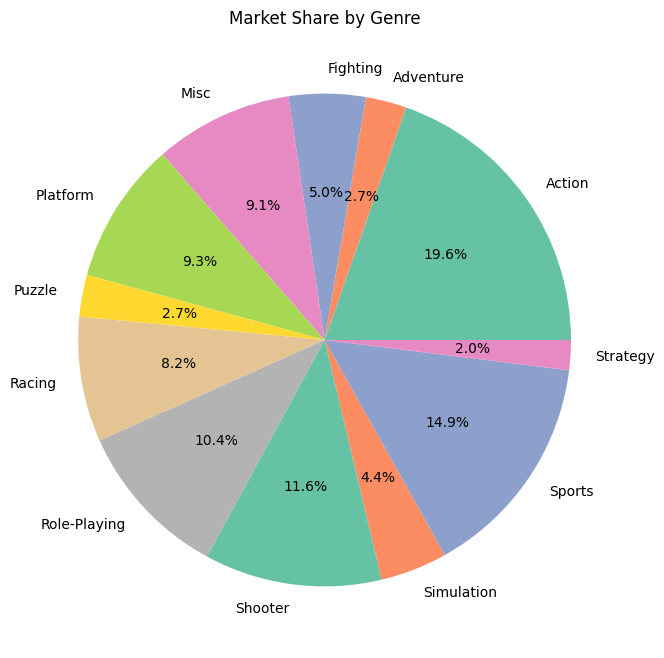

In [35]:
plt.figure(figsize=(8, 8))
plt.pie(df_genre['Global_Sales'], labels=df_genre['Genre'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Market Share by Genre')
plt.ylabel('')
plt.show()

### *Global Game Sales Over The Years*

Text(0.5, 1.0, 'Global Game Sales Over The Years')

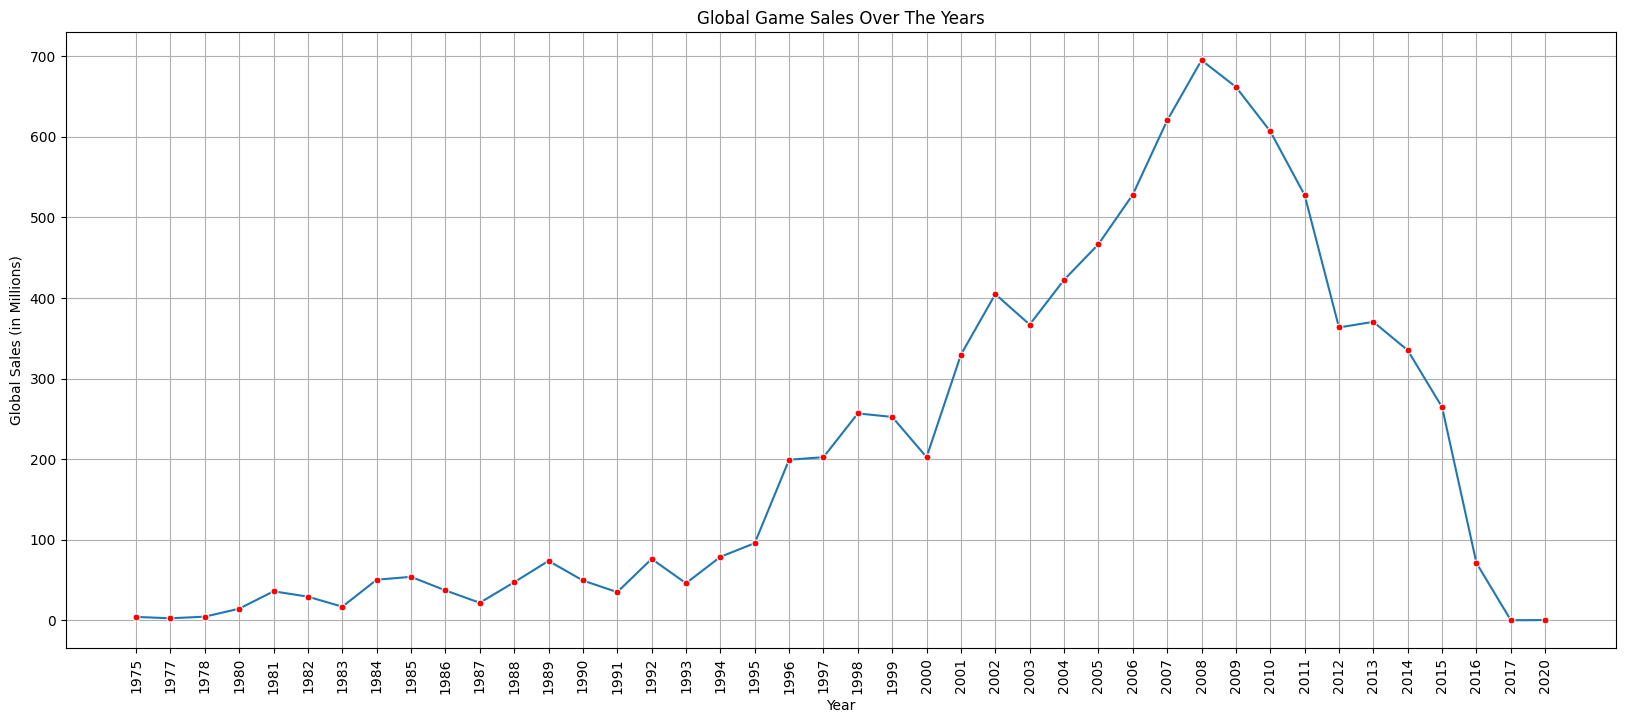

In [62]:
df_global_sales = df.groupby('Year').sum()
df_global_sales = pd.DataFrame(df_global_sales['Global_Sales'])

plt.figure(figsize=(20,8))
sns.lineplot(x = 'Year', y = 'Global_Sales', data = df_global_sales, marker = 'o', markersize = 5, markerfacecolor = 'red')
plt.xticks(rotation = 90)
plt.grid(True)
plt.ylabel("Global Sales (in Millions)")
plt.title('Global Game Sales Over The Years')



### *Game Releases Over The Years*

Text(0.5, 1.0, 'Global Game Releases Over The Years')

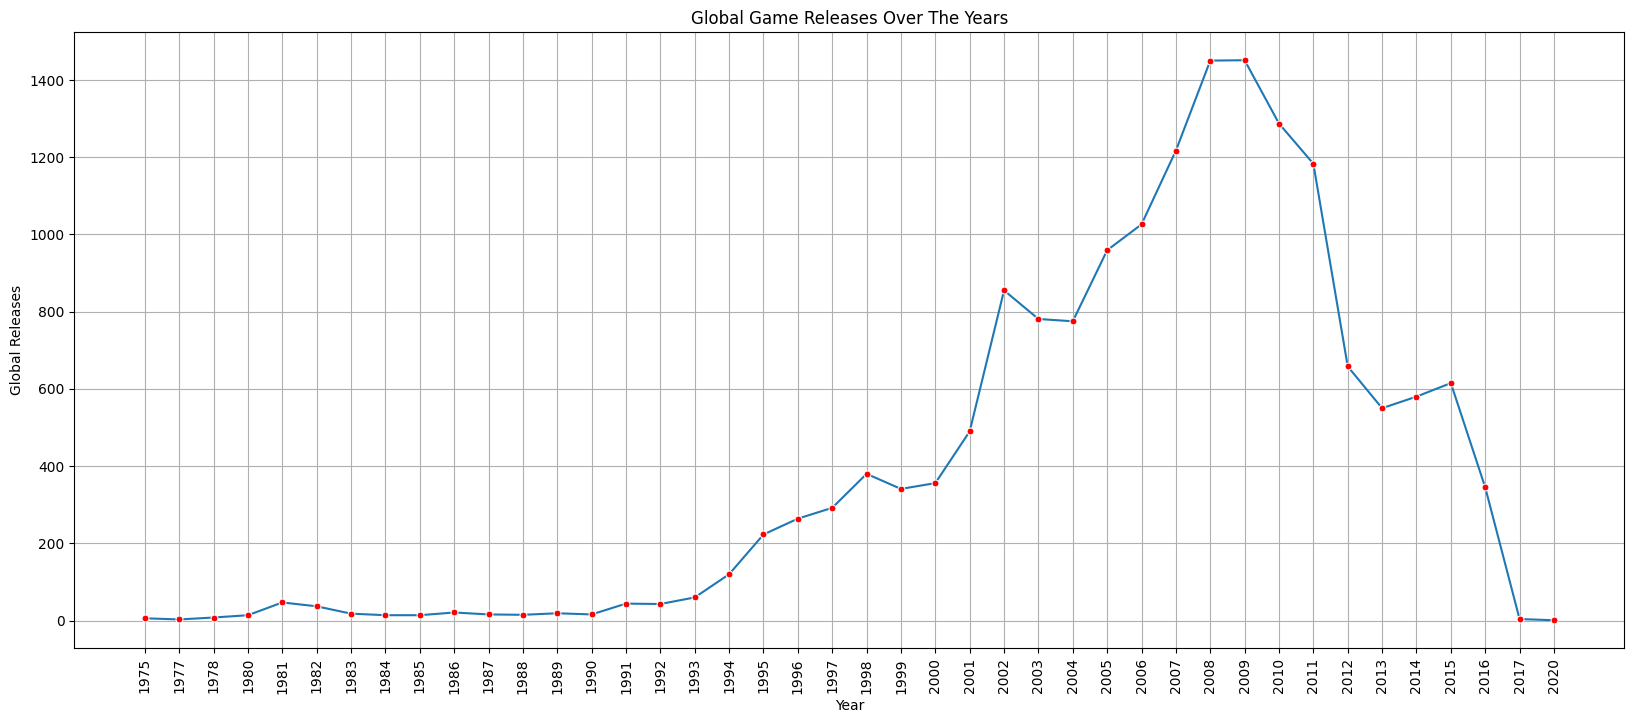

In [78]:
df_count = df.groupby('Year')['Name'].count()
df_count = pd.DataFrame(df_count)

plt.figure(figsize=(20,8))
sns.lineplot(x = 'Year', y = 'Name', data = df_count, marker = 'o', markersize = 5, markerfacecolor = 'red')
plt.xticks(rotation = 90)
plt.grid(True)
plt.ylabel("Global Releases")
plt.title('Global Game Releases Over The Years')